In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

import yaml

from lab.classifiers import kfingerprinting
from lab.third_party import li2018measuring

In [2]:
def fix_column_names(column_name):
    if '{i:03d}' in column_name:
        if len(column_name) == len("kfp-ext-{i:03d}.279"):
            return column_name.replace("{i:03d}.", "")
        elif len(column_name) == len("kfp-ext-{i:03d}.79"):
            return column_name.replace("{i:03d}.", "0")
        elif len(column_name) == len("kfp-ext-{i:03d}.9"):
            return column_name.replace("{i:03d}.", "00")
        elif len(column_name) == len("kfp-ext-{i:03d}"):
            return column_name.replace("{i:03d}", "000")
        raise ValueError("Shouldnt reach here")
    return column_name

In [3]:
def load_dataset():
    with open("../config/config.yaml", mode="r") as configfile:
        config = yaml.safe_load(configfile)
    
    predictions = pd.concat([
        pd.read_csv(f"../results/distinguisher/predictions-{train_size}.csv")
        for train_size in config["train_sizes"]
    ], keys=config["train_sizes"], names=["train_size", "sample"])
    
    # TODO: Fix merging of invalid kfp-column names
    importances = pd.concat([
        pd.read_csv(f"../results/distinguisher/importances-{train_size}.csv").rename(columns=fix_column_names)
        for train_size in config["train_sizes"]
    ], keys=config["train_sizes"], names=["train_size"]).set_index("repetition", append=True).reset_index(1, drop=True)
    return predictions, importances

predictions, importances = load_dataset()
display(predictions)
display(importances)

repetition  y_true  predictions
train_size sample                                 
10         0              0.0     1.0     0.766667
           1              0.0     0.0     0.333333
           2              0.0     1.0     0.473333
           3              0.0     0.0     0.260000
           4              0.0     1.0     0.873333
...                       ...     ...          ...
1280       300035         9.0     0.0     0.026667
           300036         9.0     1.0     0.986667
           300037         9.0     0.0     0.000000
           300038         9.0     1.0     0.913333
           300039         9.0     0.0     0.000000

[4168320 rows x 3 columns]

kfp-000   kfp-001   kfp-002   kfp-003   kfp-004  \
train_size repetition                                                     
10         0.0         0.000000  0.004444  0.001212  0.000000  0.008757   
           1.0         0.000000  0.000000  0.002393  0.003015  0.004256   
           2.0         0.001352  0.002222  0.001185  0.001306  0.005273   
           3.0         0.000000  0.000000  0.006058  0.002508  0.002222   
           4.0         0.007226  0.004058  0.000000  0.001989  0.000000   
...                         ...       ...       ...       ...       ...   
1280       5.0         0.000183  0.000169  0.000282  0.000531  0.000562   
           6.0         0.000229  0.000144  0.000222  0.000480  0.000218   
           7.0         0.000275  0.000229  0.000225  0.000277  0.000248   
           8.0         0.000252  0.000333  0.000128  0.000261  0.000302   
           9.0         0.000132  0.000223  0.000159  0.000381  0.000291   

                        kfp-005   kfp-006   kfp-007   kfp-008   kfp-009  ...  \
train_size repetition                                                    ...   
10         0.0         0.000000  0.002211  0.000000  0.003434  0.000000  ...   
           1.0         0.000000  0.001352  0.002873  0.001940  0.005306  ...   
           2.0         0.000000  0.003986  0.003300  0.001209  0.012168  ...   
           3.0         0.002957  0.001361  0.001526  0.001282  0.001307  ...   
           4.0         0.002404  0.003585  0.001282  0.000000  0.000000  ...   
...                         ...       ...       ...       ...       ...  ...   
1280       5.0         0.000435  0.000170  0.000287  0.000165  0.004834  ...   
           6.0         0.000346  0.000341  0.000369  0.000228  0.004125  ...   
           7.0         0.000453  0.000150  0.000157  0.000239  0.004449  ...   
           8.0         0.000678  0.000264  0.000290  0.000520  0.003642  ...   
           9.0         0.000402  0.000127  0.000136  0.000132  0.003871  ...   

                       kfp-ext-290  kfp-ext-291  kfp-ext-292  kfp-ext-293  \
train_size repetition                                                       
10         0.0            0.000000     0.000000     0.000000     0.000000   
           1.0            0.000000     0.002095     0.001000     0.000000   
           2.0            0.000000     0.000000     0.000000     0.000000   
           3.0            0.000000     0.003810     0.000000     0.001474   
           4.0            0.000000     0.003300     0.000000     0.000000   
...                            ...          ...          ...          ...   
1280       5.0            0.000092     0.000201     0.001251     0.000093   
           6.0            0.000249     0.000244     0.002356     0.000049   
           7.0            0.000062     0.000610     0.001227     0.000035   
           8.0            0.000095     0.000637     0.002077     0.000095   
           9.0            0.000047     0.000284     0.001312     0.000144   

                       kfp-ext-294  kfp-ext-295  kfp-ext-296  kfp-ext-297  \
train_size repetition                                                       
10         0.0            0.000000     0.001212     0.014603     0.005354   
           1.0            0.001178     0.004598     0.000926     0.004109   
           2.0            0.007104     0.003581     0.000000     0.000000   
           3.0            0.001235     0.000000     0.000000     0.000000   
           4.0            0.005455     0.000000     0.000000     0.000000   
...                            ...          ...          ...          ...   
1280       5.0            0.000158     0.000406     0.000455     0.000655   
           6.0            0.000499     0.000172     0.000370     0.001412   
           7.0            0.000209     0.000214     0.000618     0.001153   
           8.0            0.000182     0.000552     0.000360     0.001205   
           9.0            0.000502     0.000152     0.000668     0.001726   

   

In [4]:
ext_ranked_column_names = pd.read_csv("../../single-and-mixed-analyses/results/tree-importance/quic-feature-ranks.csv").iloc[:300]["feature"].values

In [5]:
importances_alt = importances.rename_axis("feature", axis=1).stack().rename("MDI").reset_index()

def name_feature(value):
    feature_set, set_idx = value.rsplit("-", maxsplit=1)
    set_idx = int(set_idx)
    
    return kfingerprinting.ALL_DEFAULT_FEATURES[set_idx] if feature_set == "kfp" else ext_ranked_column_names[set_idx]
    
importances_alt["feature"] = importances_alt["feature"].map(name_feature)
importances_alt



,train_size,repetition,feature,MDI
0,10,0.0,interarrival::in::max,0.000000
1,10,0.0,interarrival::out::max,0.004444
2,10,0.0,interarrival::overall::max,0.001212
3,10,0.0,interarrival::in::mean,0.000000
4,10,0.0,interarrival::out::mean,0.008757
...,...,...,...,...
60445,1280,9.0,Packet Ordering (TRANS_POSITION)::Incoming::90,0.000152
60446,1280,9.0,Packet Ordering (TRANS_POSITION)::Incoming::61,0.000668
60447,1280,9.0,Packet Ordering (TRANS_POSITION)::Incoming::39,0.001726
60448,1280,9.0,Packet Ordering (TRANS_POSITION)::Incoming::92,0.000224


In [6]:
median_mdi = importances_alt.groupby("feature")["MDI"].median().sort_values(ascending=False).reset_index()
median_mdi


,feature,MDI
0,BURST::first 5 bursts::1,0.106853
1,FIRST20::9,0.058247
2,size-stats::out::var,0.047918
3,size-stats::out::std,0.045664
4,FIRST20::6,0.039360
...,...,...
460,alt-pps::16,0.000000
461,alt-pps::17,0.000000
462,alt-pps::18,0.000000
463,alt-pps::19,0.000000


,feature,MDI
0,BURST::first 5 bursts::1,0.106853
1,FIRST20::9,0.058247
2,size-stats::out::var,0.047918
3,size-stats::out::std,0.045664
4,FIRST20::6,0.039360
5,FIRST20::8,0.033118
6,FIRST20::16,0.031468
7,FIRST20::18,0.029491
8,Packet Ordering (TRANS_POSITION)::Outgoing::2,0.028822
9,FIRST20::13,0.027454


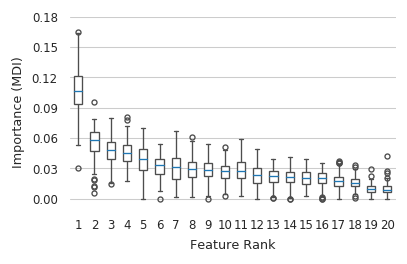

In [50]:
top_20 = importances_alt[importances_alt["feature"].isin(median_mdi["feature"].iloc[:20])]
top_20 = top_20.merge(median_mdi.reset_index(), on="feature", how="left", suffixes=("", "_median"))
top_20["index"] += 1

with plt.style.context([
    "mpl-style/pets.mplstyle",  "mpl-style/white-grid.mplstyle", "mpl-style/box-plots.mplstyle"
]):
    figure, axes = plt.subplots(figsize=(3.5, 2.1), dpi=120)

    top_20["id"] = top_20.groupby("index").cumcount()
    top_20 = top_20[["id", "index", "MDI"]].pivot(index="id", columns="index", values="MDI")
    
    axes.boxplot(top_20.values, labels=top_20.columns, flierprops=dict(markersize=3),
                 patch_artist=True)
    axes.grid(False, axis="x")
    sns.despine(left=True, bottom=True)
    plt.setp(axes.artists, facecolor='white')

    axes.set_ylim(top=0.175)
    axes.set_xlabel("Feature Rank")
    axes.set_ylabel("Importance (MDI)")
    axes.set_yticks(np.arange(0, 0.2, 0.03))
    
    display(median_mdi.iloc[:20])
    
    figure.savefig("../results/plots/distinguisher-importance.pgf", dpi=150, bbox_inches="tight")

In [8]:
predictions["y_pred"] = predictions["predictions"].round()
predictions

accuracy_scores = (predictions
                   .groupby(["train_size", "repetition"])
                   .apply(lambda x: metrics.accuracy_score(x["y_true"], x["y_pred"]) * 100)
                   .rename("accuracy")
                   .reset_index())
accuracy_scores["train_size"] *= 2
display(accuracy_scores)

,train_size,repetition,accuracy
0,20,0.0,92.474803
1,20,1.0,92.800516
2,20,2.0,89.472714
3,20,3.0,98.439036
4,20,4.0,91.162734
...,...,...,...
125,2560,5.0,99.810025
126,2560,6.0,99.780029
127,2560,7.0,99.773364
128,2560,8.0,99.856686


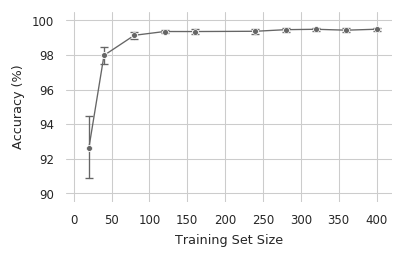

In [21]:
with plt.style.context([
    "mpl-style/pets.mplstyle", "mpl-style/white-grid.mplstyle", 
    "mpl-style/line-plots.mplstyle"
]):
    figure, axes = plt.subplots(figsize=(3.5, 2.1), dpi=120)

    plot_data = accuracy_scores[accuracy_scores["train_size"] <= 400] 
    sns.lineplot(
        x="train_size", y="accuracy", data=plot_data, ax=axes, seed=261619,
        err_style="bars",  err_kws=dict(capthick=.8)
    )
    axes.set_xlim(-10, 420)
    axes.set_ylim(89.5, 100.5)
    axes.set_yticks(np.arange(90, 102, 2))
    axes.set_xticks(np.arange(0, 450, 50))
    axes.set_xlabel("Training Set Size")
    axes.set_ylabel("Accuracy (%)")
    
    axes.get_children()[2].set_markeredgecolor("white")
    sns.despine(ax=axes, left=True, bottom=True)

    figure.savefig("../results/plots/distinguisher-performance.pgf", dpi=150, bbox_inches="tight")

In [10]:
accuracy_scores.groupby("train_size")["accuracy"].mean()

train_size
20      92.625676
40      97.982106
80      99.142963
120     99.362902
160     99.361190
240     99.376315
280     99.468777
320     99.491688
360     99.439511
400     99.494777
640     99.557700
1280    99.679389
2560    99.816025
Name: accuracy, dtype: float64